In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'S:\SUNNY PC\Elevate Labs\Datasets\heart.csv')

In [3]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [6]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [12]:
print(f'Shape : {df.shape}')

print(df.columns)

Shape : (1025, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [15]:
X = df.drop('target', axis=1)

y = df['target']

In [16]:
X.shape, y.shape

((1025, 13), (1025,))

In [17]:
from sklearnex import patch_sklearn

patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [19]:
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    cross_val_score
    )

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [20]:
import sklearn.tree as stree

dt = stree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred_dt = dt.predict(X_test)

In [23]:
import sklearn.metrics as smetrics

acc_dt = smetrics.accuracy_score(y_test, y_pred_dt)
f1_dt = smetrics.f1_score(y_test, y_pred_dt)

print(f"Accuracy : {acc_dt} ; F1-Score : {f1_dt}")

Accuracy : 0.9853658536585366 ; F1-Score : 0.9855072463768116


In [25]:
print("Classification Report :\n", smetrics.classification_report(y_test, y_pred_dt))

Classification Report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



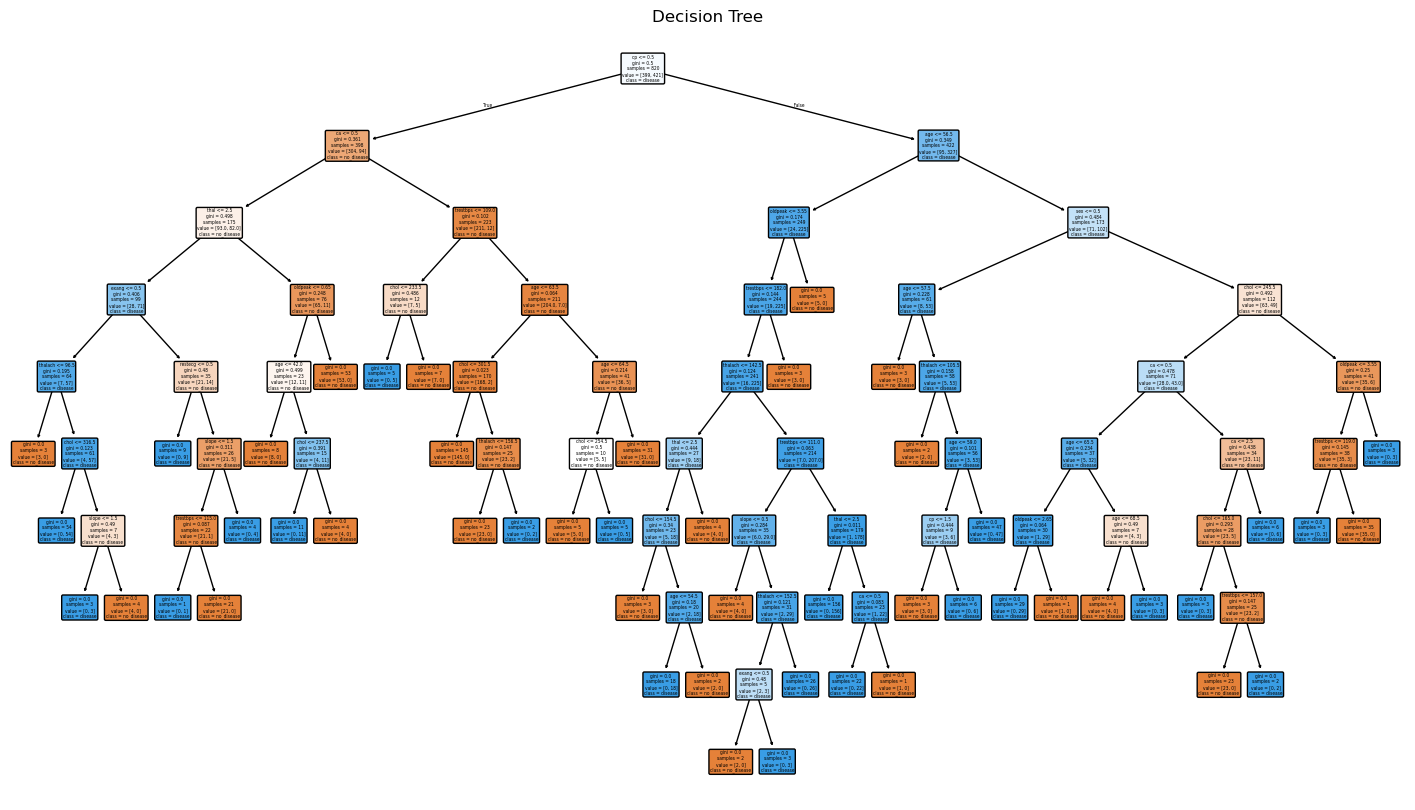

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
stree.plot_tree(
    dt,
    feature_names=X.columns.tolist(),
    class_names=["no_disease","disease"],
    filled=True,
    rounded=True,
    impurity=True
)
plt.title("Decision Tree")
plt.show()

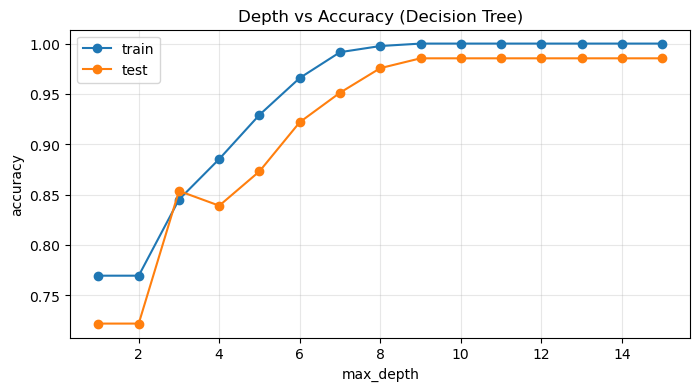

Best max_depth by test accuracy: 9


In [28]:
depths = list(range(1, 16))
train_acc, test_acc = [], []

for d in depths:
    m = stree.DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    train_acc.append(smetrics.accuracy_score(y_train, m.predict(X_train)))
    test_acc.append(smetrics.accuracy_score(y_test, m.predict(X_test)))

plt.figure(figsize=(8,4))
plt.plot(depths, train_acc, marker="o", label="train")
plt.plot(depths, test_acc, marker="o", label="test")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Depth vs Accuracy (Decision Tree)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

best_depth = depths[int(np.argmax(test_acc))]
print("Best max_depth by test accuracy:", best_depth)

In [30]:
dt_best = stree.DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_best.fit(X_train, y_train)
y_pred_dt_best = dt_best.predict(X_test)
acc_dt_best = smetrics.accuracy_score(y_test, y_pred_dt_best)
f1_dt_best = smetrics.f1_score(y_test, y_pred_dt_best)
print("DT (tuned) - Acc:", acc_dt_best, "F1:", f1_dt_best)

DT (tuned) - Acc: 0.9853658536585366 F1: 0.9855072463768116


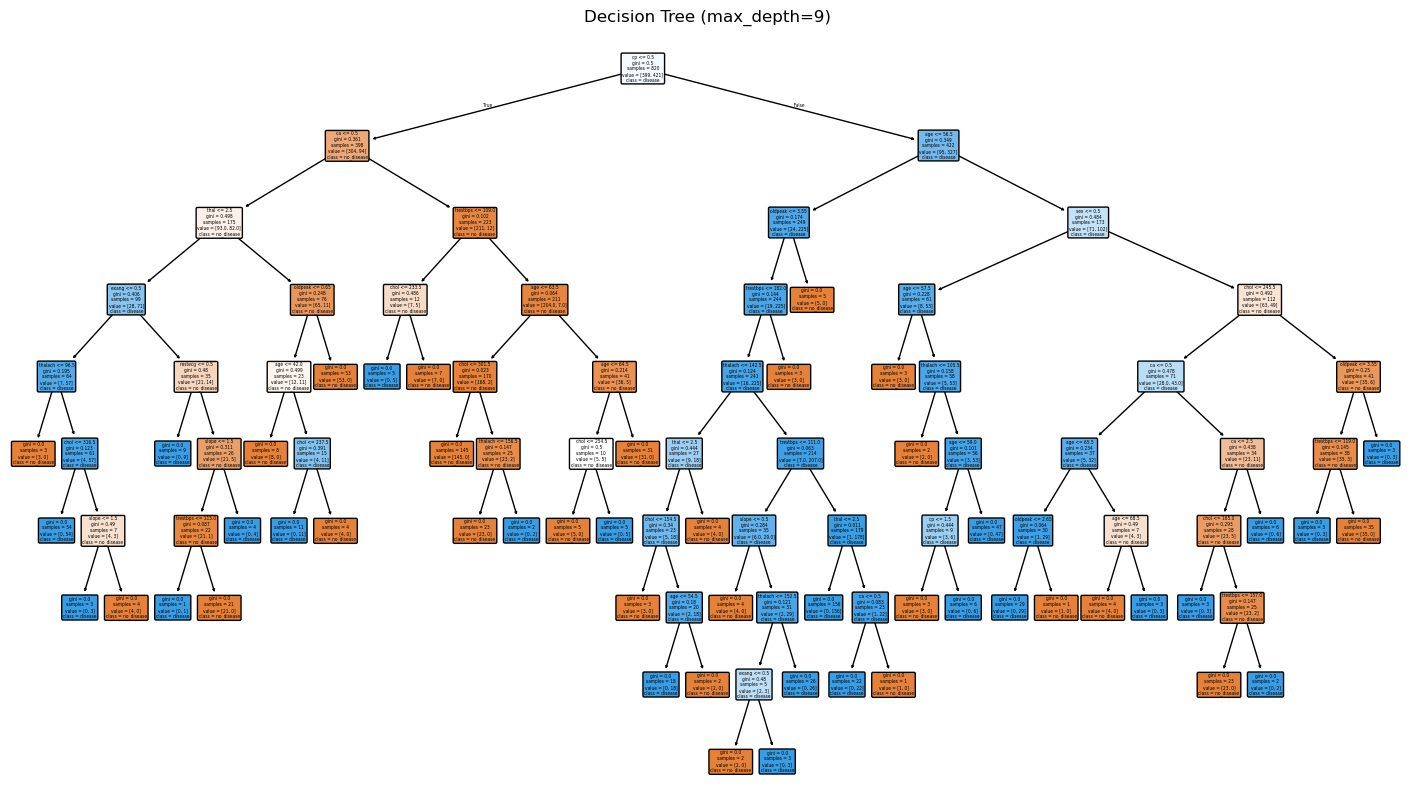

In [31]:
plt.figure(figsize=(18, 10))
stree.plot_tree(
    dt_best,
    feature_names=X.columns.tolist(),
    class_names=["no_disease","disease"],
    filled=True,
    rounded=True
)
plt.title(f"Decision Tree (max_depth={best_depth})")
plt.show()

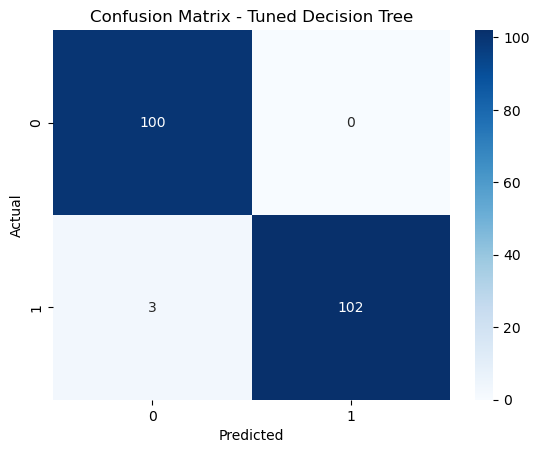

In [32]:
import seaborn as sns

# Confusion matrix
cm = smetrics.confusion_matrix(y_test, y_pred_dt_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
import sklearn.ensemble as ens

rf = ens.RandomForestClassifier(
    n_estimators=300,
    max_depth=None,      # let it learn; RF is robust via averaging
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = smetrics.accuracy_score(y_test, y_pred_rf)
f1_rf = smetrics.f1_score(y_test, y_pred_rf)
print("RF - Acc:", acc_rf, "F1:", f1_rf)
print(smetrics.classification_report(y_test, y_pred_rf))

RF - Acc: 1.0 F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



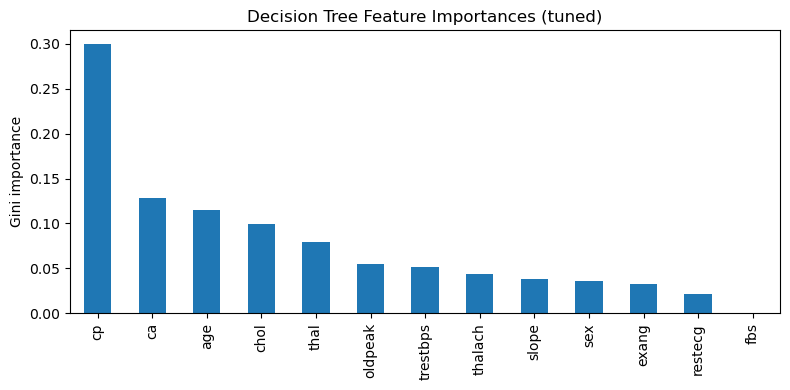

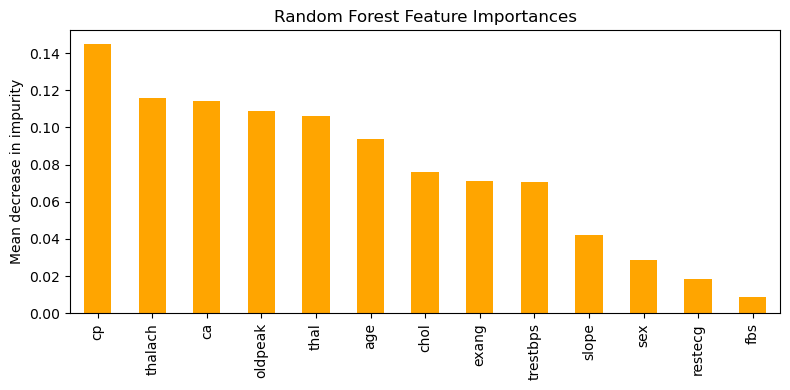

In [35]:
importances_dt = pd.Series(dt_best.feature_importances_, index=X.columns).sort_values(ascending=False)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,4))
importances_dt.head(15).plot(kind="bar")
plt.title("Decision Tree Feature Importances (tuned)")
plt.ylabel("Gini importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
importances_rf.head(15).plot(kind="bar", color="orange")
plt.title("Random Forest Feature Importances")
plt.ylabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()

In [38]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv = stree.DecisionTreeClassifier(max_depth=best_depth, random_state=42)
rf_cv = ens.RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

scores_dt = cross_val_score(dt_cv, X, y, cv=cv, scoring="accuracy")
scores_rf = cross_val_score(rf_cv, X, y, cv=cv, scoring="accuracy")

print("CV Accuracy (DT tuned): mean=", scores_dt.mean().round(4), "std=", scores_dt.std().round(4))
print("CV Accuracy (RF):       mean=", scores_rf.mean().round(4), "std=", scores_rf.std().round(4))

CV Accuracy (DT tuned): mean= 0.9971 std= 0.0059
CV Accuracy (RF):       mean= 0.9961 std= 0.0078


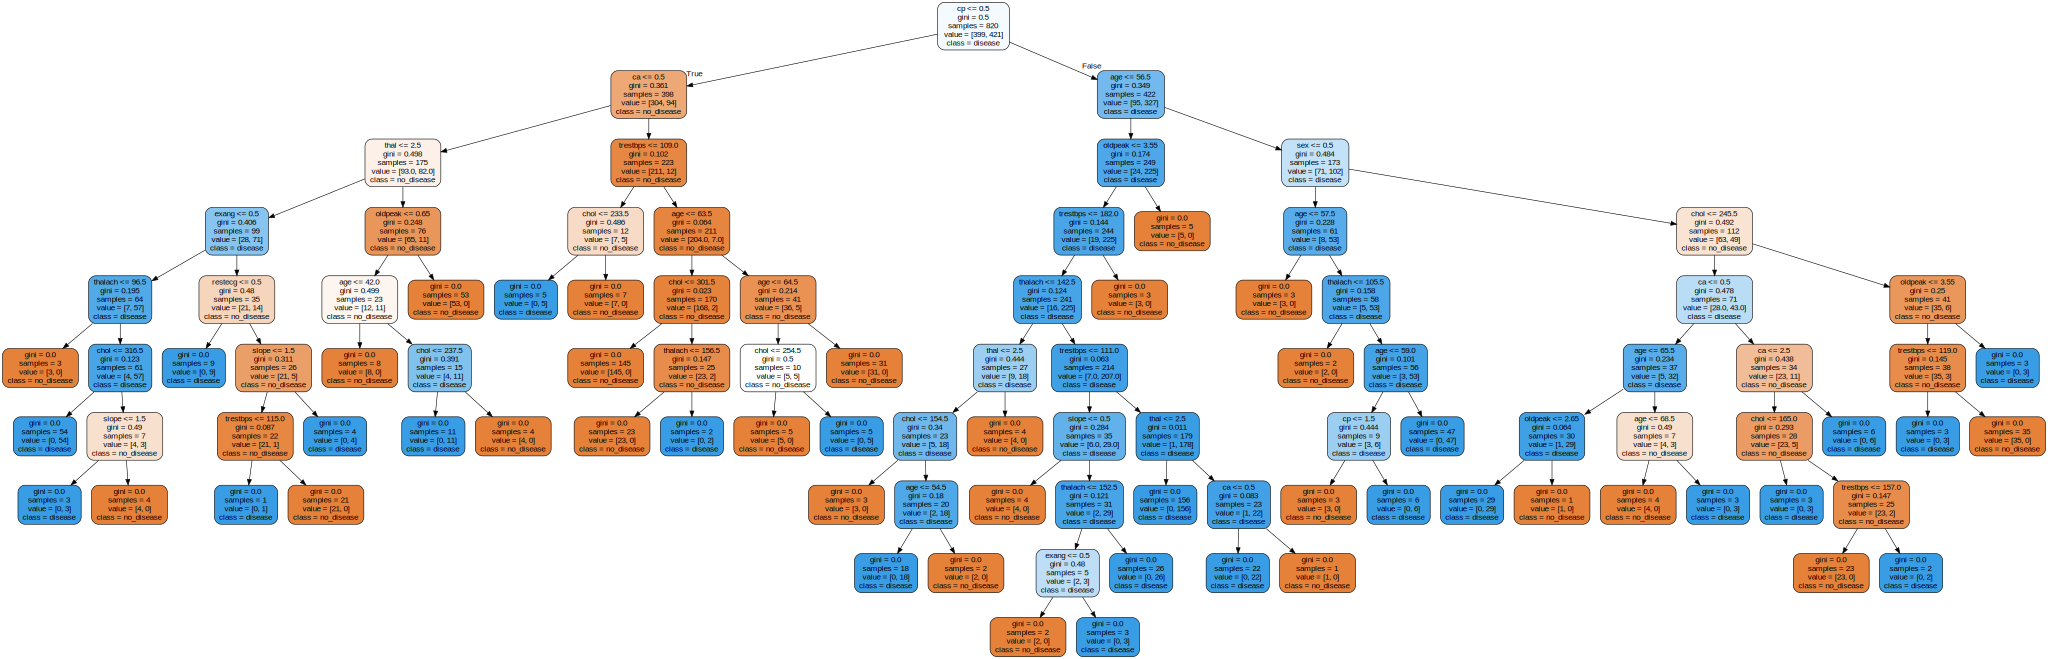

In [39]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(
    dt_best,                               # fitted DecisionTreeClassifier
    out_file=None,                          # return string
    feature_names=X.columns.tolist(),       # column names
    class_names=["no_disease","disease"],   # class labels
    filled=True, rounded=True, impurity=True
)

graph = graphviz.Source(dot)  # Jupyter can display this inline
graph  